<h1 style="font-size:3rem;color:black;">Jupyter Notebook Προσομοίωση τοιχοπληρώσεων</h1>

In [6]:
import math as m
import matplotlib.pyplot as plt

# Δεδομένα 



In [30]:

# Διαστάσεις φορέα 
L = 6 # Μήκος ανοίγματος L (m)
H_is = 3.25 # Ύψος ισογείου H (m)
H_or = 4.25 # Ύψος ορόφων H (m)

# Διαστάσεις Δοκών 
h_is = 0.70 # Ύψος δοκού ισογείου Η (m) 
h_or = 0.60 # Ύψος δοκού ορόφου Η (m) 
bw = 0.25 # Πλάτος δοκών b (m) 

# Διαστάσεις Στύλων  
bc_is = hc_is = 0.40 # Στύλοι ισογείου (m)
bc_or = hc_or = 0.35 # Στύλοι ορόφων (m)

# Υλικά 
# Σκυρόδεμα 
fcm = 21.6 # Mpa 
Ecm = 27700 # Mpa

# Φορτία δοκών 
g = 30.80 # kN/m
q = 10.50 # kN/m





# Προσομοίωση Τοιχοπλήρωσης σύμφωνα με τον ΚΑΝ.ΕΠΕ.

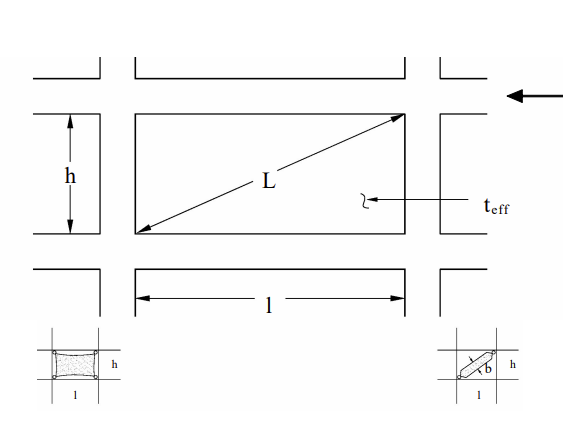

Διαστάσεις θλιβόμενης Διαγωνίου
L Διαγωνίου ισογείου  = 5.792m
b Διαγωνίου ισογείου = 0.869m
L Διαγωνίου ορόφου  = 6.435m
b Διαγωνίου ορόφου = 0.965m
Πάχος διαγωνίου ισογείου και ορόφου = 0.200m
Μέτρο ελαστικότητας = 1722.904Mpa
Θλιπτική αντοχή τοιχοπλήρωσης = 1.723Mpa


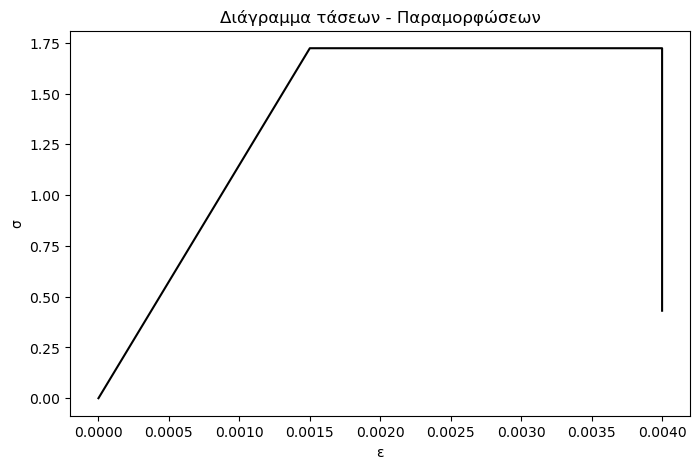

In [60]:
#### Διαστάσεις  
h_t_is = H_is - h_is # Καθαρό ύψος τοιχοπλήρωσης ισογείου h (m)
h_t_or = H_or - h_or # Καθαρό ύψος τοιχοπλήρωσης ορόφου h (m)
l_t_is = L - 2*bc_is # Καθαρό μήκος τοιχοπλήρωσης ισογείου l (m) 
l_t_or = L - 2*bc_or # Καθαρό μήκος τοιχοπλήρωσης ορόφου l (m)

# Διαστάσεις θλιβόμενης Διαγωνίου 

#Μήκος
L_diag_is = m.sqrt((l_t_is**2)+(h_t_is**2)) # Μήκος θλιβόμενης Διαγωνίου ισογείου L (m)
L_diag_or = m.sqrt((l_t_or**2)+(h_t_or**2)) # Μήκος θλιβόμενης Διαγωνίου ορόφου L (m)

#Πλ΄άτος στην περίπτωση στάθμη επιτελεστικότητας Β (Σημαντικές Βλάβες)
b_diag_is = 0.15*L_diag_is # Πλάτος θλιβόμενης Διαγωνίου ισογείου b (m) 
b_diag_or = 0.15*L_diag_or # Πλάτος θλιβόμενης Διαγωνίου ορόφου b (m) 

teff = 0.20 # Για ενιαίες κατά την διατομή όσο το t της τοιχοπλήρωσης σύμφωνα με τον Ευρωκώδικα 6 (m)



print('Διαστάσεις θλιβόμενης Διαγωνίου')
print(f'L Διαγωνίου ισογείου  = {L_diag_is:.3f}m')
print(f'b Διαγωνίου ισογείου = {b_diag_is:.3f}m')
print(f'L Διαγωνίου ορόφου  = {L_diag_or:.3f}m')
print(f'b Διαγωνίου ορόφου = {b_diag_or:.3f}m')
print(f'Πάχος διαγωνίου ισογείου και ορόφου = {teff:.3f}m')



# Χαρακτηριστική τιμή της θλιπτικής αντοχής της τοιχοποιίας κατά την κατακόρυφη διεύθυνση Fwc,k κατά τον ΕΚ 6 
λm = 1.5 # Συντελεστής μετατροπής της χαρακτηριστικής αντοχής σε μέση
λs = 0.70 # Mειωτικός συντελεστής για την δυσμενή υπό γωνία εφαρμογή του φορτίου (0.60 εώς 0.90 στην περίπτωση που δεν διατίθενται ακριβέστερα στοιχεία)
λc = 1.2 # Aυξητικός συντελεστής για την ευμενή επιρροή της περίσφιγξης την οποίαν εξασφαλίζουν τα περιβάλλοντα την τοιχοπλήρωση δομικά στοιχεία οπλισμένου σκυροδέματος
fbc = 4 # Η θλιπτική αντοχή του τοιχοσώματος (3.1 έως 5.5) Mpa 
fmc = 1.6 # Η θλιπτική αντοχή του κονιάματος (1.53 έως 1.75) Mpa 
k_t1 = 0.45 # Εμπειρικός συντελεστής, ο οποίος λαμβάνει υπόψη την ομάδα στην οποία κατατάσσονται τα τοιχοσώματα και το είδος του κονιάματος δομήσεως (0.35 εώς 0.55)

fwcs = λm*λs*λc*k_t1*(fbc**0.7)*(fmc**0.3) # Θλιπτική αντοχή της τοιχοποιίας κατά την κατακόρυφη διεύθυνση (Mpa)


# Μέτρο ελαστικότητας
#𝐸𝑚 ≈ 600𝑓𝑤𝑐,𝑠 για στάθμη επιτελεστικότητας Β (Σημαντικές Βλάβες)
#𝛦𝑚 ≈ 900𝑓𝑤𝑐,𝑠 για στάθμη επιτελεστικότητας Α (Περιορισμένες Βλάβες).

k_t2 = 1000 # Εμπειρικός συντελεστής σύμφωνα με τον Ευρωκώδικα 6 (500 εώς 1000 φορές την θλιπτική αντο΄χή)
E = k_t2*fwcs # Mpa
print(f'Μέτρο ελαστικότητας = {E:0.3f}Mpa')

print(f'Θλιπτική αντοχή τοιχοπλήρωσης = {fwcs:.3f}Mpa')



#Διάγραμμα τάσεων - παραμορφώσεων (τιμές απο το ΚΑΝ.ΕΠΕ §7.4.1)
ey = 0.0015 # Παραμόρφωση διαρροής
eu = 0.004 # Παραμόρφωση αστοχίας



#Data 
y = [0, fwcs, fwcs, 0.25*fwcs]
x = [0, ey, eu, eu]

#Plot
plt.figure(figsize=(8, 5))
plt.plot(x, y, marker='', linestyle='-',color='0', label="")

# Labels and Title
plt.xlabel("ε")
plt.ylabel("σ")
plt.title("Διάγραμμα τάσεων - Παραμoρφώσεων")
plt.show()




#γm = 1.7 

#Τοιχοπληρώσεις f m = min ( 1,5 f k , f k + 0,05 ή 0,50 MΡa, για διάτμηση ή λοξή θλίψη, αντιστοίχως)



# Προσομοίωση Τοιχοπλήρωσης σύμφωνα με τον FEMA 356


In [30]:
#Στην παράγραφο 7.5.2

####Διαστάσεις 

